In [1]:
#Importación de paquetes
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Carga de datos
demographic = pd.read_csv('../data/national-health-and-nutrition-examination-survey/demographic.csv', sep=',')
diet = pd.read_csv('../data/national-health-and-nutrition-examination-survey/diet.csv', sep=',')
examination = pd.read_csv('../data/national-health-and-nutrition-examination-survey/examination.csv', sep=',')
labs = pd.read_csv('../data/national-health-and-nutrition-examination-survey/labs.csv', sep=',')
medications = pd.read_csv('../data/national-health-and-nutrition-examination-survey/medications.csv', sep=',', 
                          encoding='iso-8859-1')
questionnaire = pd.read_csv('../data/national-health-and-nutrition-examination-survey/questionnaire.csv', sep=',')

In [3]:
#Número de filas y columnas de cada archivo.

print('El archivo demographic tiene {} filas y {} columnas.'.format(demographic.shape[0], demographic.shape[1]))
print('El archivo diet tiene {} filas y {} columnas.'.format(diet.shape[0], diet.shape[1]))
print('El archivo examination tiene {} filas y {} columnas.'.format(examination.shape[0], examination.shape[1]))
print('El archivo demographic tiene {} filas y {} columnas.'.format(labs.shape[0], labs.shape[1]))
print('El archivo medications tiene {} filas y {} columnas.'.format(medications.shape[0], medications.shape[1]))
print('El archivo questionnaire tiene {} filas y {} columnas.'.format(questionnaire.shape[0], questionnaire.shape[1]))

El archivo demographic tiene 10175 filas y 47 columnas.
El archivo diet tiene 9813 filas y 168 columnas.
El archivo examination tiene 9813 filas y 224 columnas.
El archivo demographic tiene 9813 filas y 424 columnas.
El archivo medications tiene 20194 filas y 13 columnas.
El archivo questionnaire tiene 10175 filas y 953 columnas.


In [4]:
#Limpieza de medications

medications = medications[medications.RXDRSD1.notnull()]

In [5]:
#Agrupamos por SEQN, ya que en medications aparece más de un registro por paciente, debido a que un paciente puede haber 
# sido tratado por más de un motivo. Para ello creamos un registro por paciente que tenga como variable cada una de las
# enfermedades del conjunto de datos como variable binarizada. Guardamos solo las variables de interés.

medications2 = pd.get_dummies(medications[['SEQN', 'RXDRSC1']]).groupby(['SEQN']).sum()

for i in medications2.columns:
    medications2.loc[medications2[i] > 1, i] = 1

In [6]:
# Reseteamos los valores de index.
medications2 = medications2.reset_index()

In [7]:
#Convertimos el nombre de las variables de medications2 a lista para poder tenerlas identificadas y poder tratarlas después.
variablesMedications = medications2.columns.to_list()

In [8]:
#Creamos el dataframe con el resto de los archivos mediante merge con la columna SEQN.
df = pd.merge(demographic, examination, how='outer', on='SEQN')
# df
df = pd.merge(df, diet, how='outer', on='SEQN')
# df
df = pd.merge(df, labs, how='outer', on='SEQN')
# df
df = pd.merge(df, questionnaire, how='outer', on='SEQN')
# df
df = pd.merge(df, medications2, how='inner', on='SEQN')

In [9]:
# ver primeros 5 registros
df.head(5)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,73562,8,2,1,56,NaN,1,1,1.0,NaN,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDRSC1_Z91.030,RXDRSC1_Z94.0,RXDRSC1_Z95.0,RXDRSC1_Z95.2,RXDRSC1_Z95.5,RXDRSC1_Z95.9,RXDRSC1_Z96.64,RXDRSC1_Z96.65,RXDRSC1_Z98.84,RXDRSC1_Z99.2
count,4016.000000,4016.0,4016.000000,4016.000000,4016.000000,101.000000,4016.000000,4016.000000,3908.000000,744.000000,...,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,78598.651643,8.0,1.973108,1.547809,47.444223,10.524752,3.139442,3.293576,1.507932,116.831989,...,0.000249,0.000249,0.000249,0.001494,0.001245,0.000249,0.000249,0.000249,0.000249,0.000747
std,2922.979225,0.0,0.161789,0.497771,23.873470,6.247550,1.094753,1.406521,0.500001,69.589297,...,0.015780,0.015780,0.015780,0.038629,0.035267,0.015780,0.015780,0.015780,0.015780,0.027325
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76077.750000,8.0,2.000000,1.000000,29.000000,6.000000,3.000000,3.000000,1.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78574.000000,8.0,2.000000,2.000000,52.000000,10.000000,3.000000,3.000000,2.000000,118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81124.750000,8.0,2.000000,2.000000,67.000000,15.000000,4.000000,4.000000,2.000000,177.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83724.000000,8.0,2.000000,2.000000,80.000000,23.000000,5.000000,7.000000,2.000000,239.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Contar los nan
df.isnull().sum()

SEQN                  0
SDDSRVYR              0
RIDSTATR              0
RIAGENDR              0
RIDAGEYR              0
RIDAGEMN           3915
RIDRETH1              0
RIDRETH3              0
RIDEXMON            108
RIDEXAGM           3272
DMQMILIZ            664
DMQADFC            3598
DMDBORN4              0
DMDCITZN              2
DMDYRSUS           3298
DMDEDUC3           3482
DMDEDUC2            764
DMDMARTL            764
RIDEXPRG           3507
SIALANG               0
SIAPROXY              1
SIAINTRP              0
FIALANG              40
FIAPROXY             40
FIAINTRP             40
MIALANG             616
MIAPROXY            615
MIAINTRP            614
AIALANGA           1448
DMDHHSIZ              0
                   ... 
RXDRSC1_T78.40        0
RXDRSC1_T86.9P        0
RXDRSC1_T88.7         0
RXDRSC1_W54.0         0
RXDRSC1_Z34.9         0
RXDRSC1_Z47           0
RXDRSC1_Z48.29        0
RXDRSC1_Z48.810       0
RXDRSC1_Z51.11        0
RXDRSC1_Z77.120       0
RXDRSC1_Z79.02  

In [12]:
# Tabla de frecuencia de las enfermedades.
conteo = dict()
for v in variablesMedications[1:]:
    key = v.split('_')[1]
    conteo[key]=pd.value_counts(df[v])[1]

In [13]:
conteoEnfermedad = pd.Series(data=conteo)
conteoEnfermedad = conteoEnfermedad.sort_values(ascending=False)
conteoEnfermedad

I10        1595
E78.0      1101
E11         575
K21         434
F32.9       399
J45         348
F41.9       346
E03.9       334
M54.9       214
G47.0       198
J30.9       184
K30         174
F90         166
T78.40      150
R60.9       137
M79.2       127
I21.P       118
D75.9P      118
Z79.3       115
G47.9       110
E87.6       109
N40          94
M79.1        92
I49.9        91
G43          85
I50.9        81
M62.83       77
M81          72
G40          69
M19.9        69
           ... 
N39.0P        1
N41.0         1
J02.0P        1
N48.89        1
N61           1
F11.2         1
E87.8         1
N81.4         1
M79.646       1
F95.2         1
G89.3         1
M62.81        1
L02.92        1
G83.9         1
G81.1         1
L22           1
L55           1
L57.8         1
L73.0         1
G45.9         1
L73.9         1
L97           1
M25.52        1
M25.53        1
M27.2         1
M31.6         1
M43.9         1
M51.9         1
M60.9         1
A08.4         1
Length: 470, dtype: int6

In [15]:
# Tabla de frecuencia relativa de enfermedades
    
frecuenciaRelativa = 100 * conteoEnfermedad / sum(conteoEnfermedad.values)
frecuenciaRelativa = frecuenciaRelativa.sort_values(ascending=False)
frecuenciaRelativa

I10        14.182821
E78.0       9.790148
E11         5.112929
K21         3.859150
F32.9       3.547928
J45         3.094434
F41.9       3.076649
E03.9       2.969945
M54.9       1.902899
G47.0       1.760626
J30.9       1.636137
K30         1.547217
F90         1.476080
T78.40      1.333808
R60.9       1.218211
M79.2       1.129290
I21.P       1.049262
D75.9P      1.049262
Z79.3       1.022586
G47.9       0.978126
E87.6       0.969234
N40         0.835853
M79.1       0.818069
I49.9       0.809177
G43         0.755824
I50.9       0.720256
M62.83      0.684688
M81         0.640228
G40         0.613551
M19.9       0.613551
             ...    
C41.9       0.008892
B97.4       0.008892
Z91.030     0.008892
T30.0       0.008892
B86         0.008892
N91.0       0.008892
J01         0.008892
E87.1       0.008892
K74.5       0.008892
H81.9       0.008892
R94.5       0.008892
C95.9       0.008892
D25.P       0.008892
D35.2       0.008892
Z94.0       0.008892
Z95.0       0.008892
A49.02      0

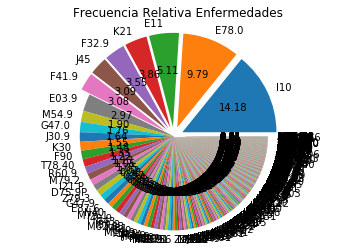

In [16]:
labels = list(conteoEnfermedad.index)
sizes = list(conteoEnfermedad.values)
explode = np.zeros(len(conteoEnfermedad.index))
explode[0:7] = 0.1

plt.pie(sizes, labels=labels, explode=explode, autopct='%.2f')
plt.title('Frecuencia Relativa Enfermedades')


plt.axis('equal')
plt.show()

In [17]:
# df.to_csv('df.csv', header=True, index=False)